In [5]:
##########################################
## II. Analytics ########
########################################


# import libraries and table from preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# import database
df = pd.read_pickle ("df_clean.pkl")

# Define a consistent color mapping for fields.
color_mapping = {
    "Physics": "Purple",
    "Computer Science": "orange",
    "Mathematics": "blue",
    "Statistics": "red",
    "Quantitative Biology": "green",
    "Quantitative Finance": "brown",
    "Other": "gray"
}

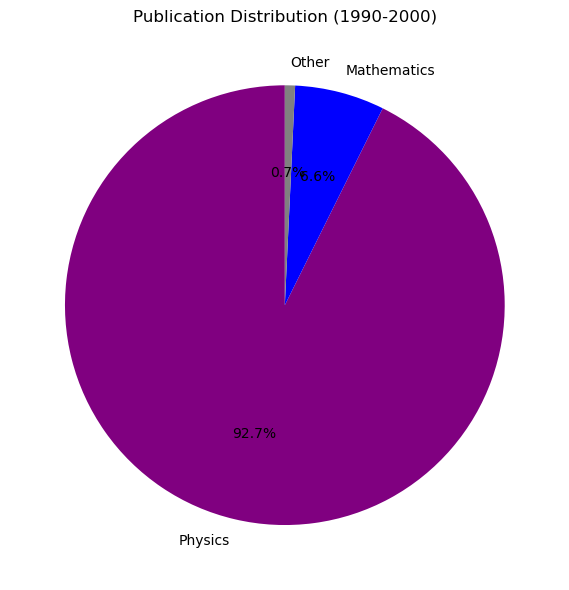

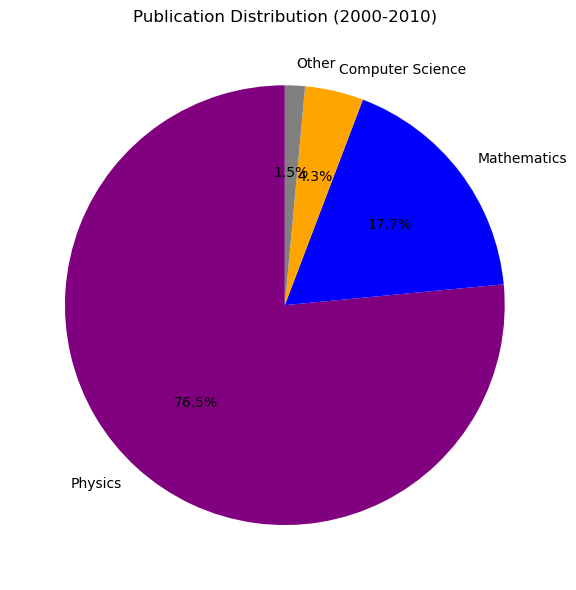

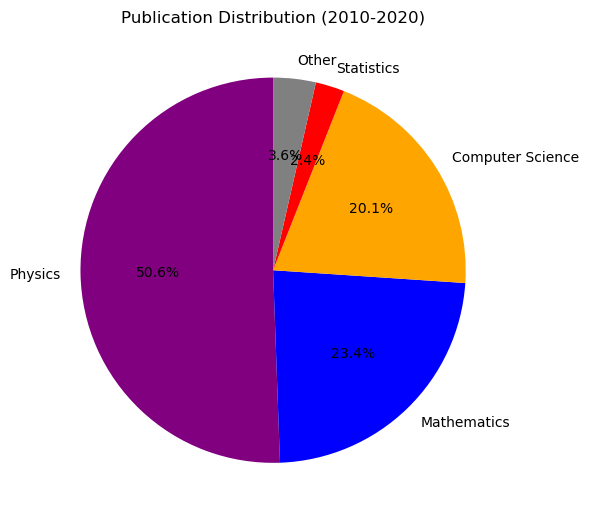

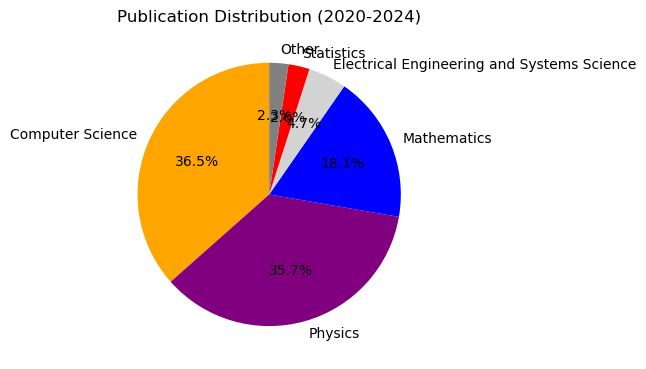

In [6]:
### 1. Create Pie Chart from binned year ranges



# Define year ranges (inclusive).
year_ranges = [
    (1990, 2000),
    (2000, 2010),
    (2010, 2020),
    (2020, 2024)
]

# Loop through each year range to create a pie chart.
for start, end in year_ranges:
    # Filter the DataFrame for the given year range.
    df_subset = df[df['year'].between(start, end)]
    
    # Count the number of publications per field.
    counts = df_subset['field'].value_counts()
    
    # Calculate total counts and percentages.
    total = counts.sum()
    perc = counts / total
    
    # Set the threshold (1.5% in decimal form).
    threshold = 0.015
    
    # Split counts: main counts and those below threshold.
    main_counts = counts[perc >= threshold].copy()
    others_count = counts[perc < threshold].sum()
    
    # If there are any fields below the threshold, group them as "Other".
    if others_count > 0:
        main_counts["Other"] = others_count

    # Create a list of colors for the pie chart based on our mapping.
    # If a field is missing from the mapping, it will default to a fallback color.
    colors = [color_mapping.get(field, "lightgray") for field in main_counts.index]
    
    # Plot the pie chart.
    plt.figure(figsize=(6, 6))
    main_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Publication Distribution ({start}-{end})')
    plt.ylabel('')  # Hide the default y-label
    plt.tight_layout()
    plt.show()


In [ ]:
#### 2. Create Chart of shares over time

# 1. Group by year and field to count the number of publications
grouped = df.groupby(["year", "field"]).size().reset_index(name="count")

# 2. Pivot so that each row is a year, each column is a field, and the cell value is the count
pivot_data = grouped.pivot(index="year", columns="field", values="count").fillna(0)

# 3. Filter out years before 1994
pivot_data = pivot_data.loc[pivot_data.index >= 1994]

# 4. Calculate the total publications per year, then compute the percentage share per field
year_totals = pivot_data.sum(axis=1)
shares = pivot_data.div(year_totals, axis=0) * 100  # convert to percentages

# 5. Plot the share of each field over time, removing data points (no marker)
plt.figure(figsize=(10, 6))

for column in shares.columns:
    plt.plot(shares.index, shares[column], label=column)  # no marker parameter

plt.title("Share of Publications Over Time by Field (from 1994)")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.legend(title="Field", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


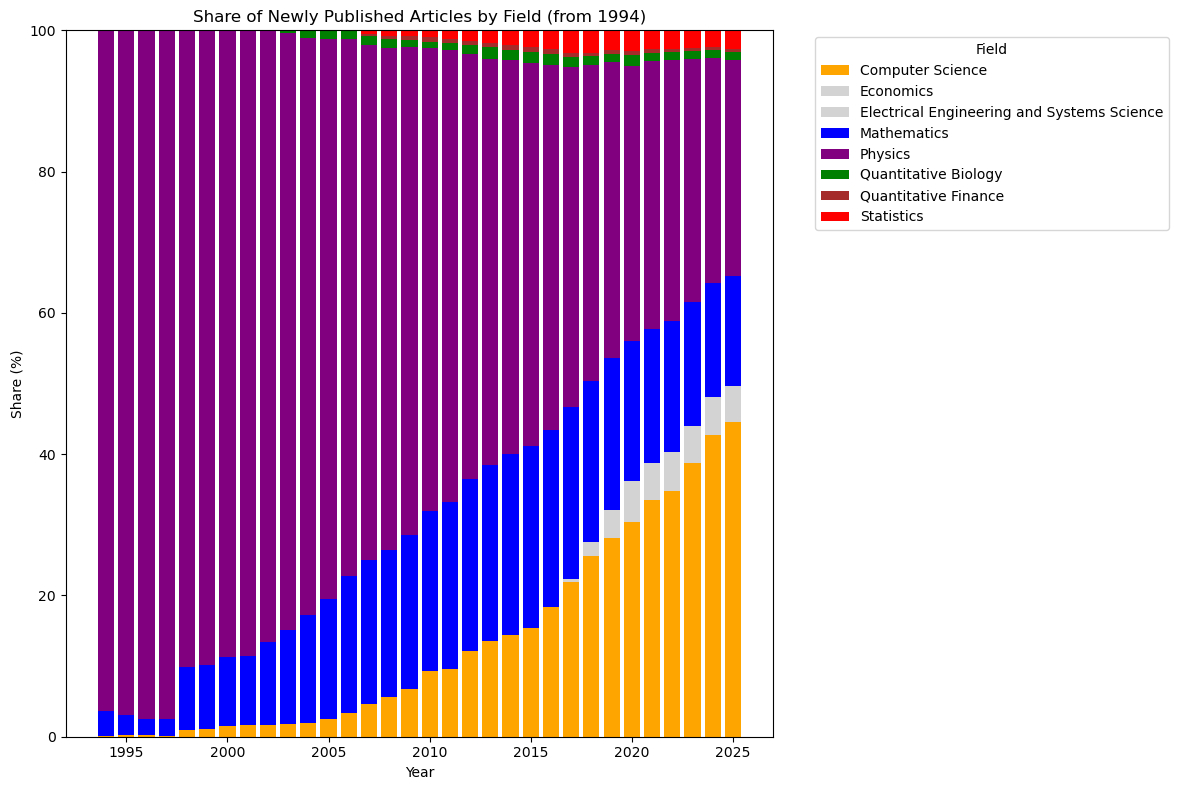

In [7]:
# 1. Group by year and field to count the number of publications
grouped = df.groupby(["year", "field"]).size().reset_index(name="count")

# 2. Pivot so that each row is a year and each column a field; fill missing with 0
pivot_data = grouped.pivot(index="year", columns="field", values="count").fillna(0)

# 3. Filter out years before 1994 (assuming year is numeric)
pivot_data = pivot_data.loc[pivot_data.index >= 1994]

# 4. For each year, compute the percentage share per field (newly published articles per year)
year_totals = pivot_data.sum(axis=1)
shares = pivot_data.div(year_totals, axis=0) * 100  # now each row sums to 100%

# 5. Plot a stacked bar chart using the consistent color mapping.
plt.figure(figsize=(12, 8))

# Initialize the bottom for stacking as an array of zeros with length equal to the number of years.
bottom = np.zeros(len(shares.index))

# For each field (i.e. each column in shares), plot the share values stacked on top of each other.
for field in shares.columns:
    plt.bar(
        shares.index,
        shares[field],
        bottom=bottom,
        color=color_mapping.get(field, "lightgray"),  # default to lightgray if not found
        label=field
    )
    # Update the bottom for the next field
    bottom += shares[field].values

plt.title("Share of Newly Published Articles by Field (from 1994)")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.ylim(0, 100)
plt.legend(title="Field", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
